# Simple Barycenter Computation

In [ ]:

from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 
import itertools

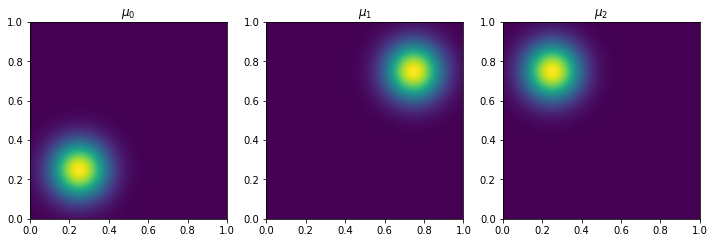

In [38]:
# Grid of size n1 x n2
n1 = 400   # x axis
n2 = 400   # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

# positions = np.array([[0.25,0.75],
#                       [0.5, 0.75],
#                       [ 0.55,0.35],
#                       [0.65,0.25]])

positions = np.array([[0.25,0.25],
                      [ 0.75,0.75],
                      [0.25,0.75]])

# measures = [None]*len(positions)
measures = [None]*(len(positions))

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i] = np.exp(-0.5*((x-xc)**2 + (y-yc)**2)*100.0)
#    measures[i][(x-xc)**2 + (y-yc)**2 < r**2] = 1

    # Normalize
    measures[i] *= n1*n2 / np.sum(measures[i])

# Plot mu and nu
# fig, ax = plt.subplots(1, len(positions), figsize=(12,4))
# for i in range(len(positions)):
#   ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
#   ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

fig, ax = plt.subplots(1, len(measures), figsize=(12,4))
for i in range(len(measures)):
    ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
    ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

0


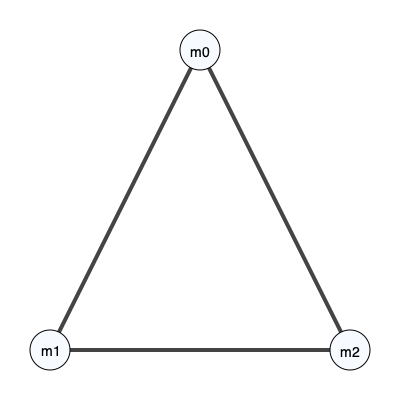

In [39]:
unroll_node = 0

# The set A that defines the pairwise costs
edge_list = [[0,1], [1,2], [0,2]]


prob = MMOTSolver(measures, edge_list, x, y, unroll_node)

prob.Visualize('original', filename='CostGraph.svg')

Iteration, StepSize,    Cost,   Error
        0,   0.2000,  0.2408,   1.99973
        2,   0.2000,  0.4294,   0.56219
        4,   0.2000,  0.4659,   0.31522
        6,   0.1000,  0.4787,   0.05600
        8,   0.1000,  0.4837,   0.08095
       10,   0.1000,  0.4868,   0.01570
       12,   0.1000,  0.4877,   0.01486
       14,   0.1000,  0.4886,   0.00705
       16,   0.1000,  0.4893,   0.00635
       18,   0.1000,  0.4897,   0.00389
       20,   0.1000,  0.4901,   0.00383
       22,   0.1000,  0.4904,   0.00294
       24,   0.0500,  0.4906,   0.00321
       26,   0.0500,  0.4907,   0.00209
       28,   0.0500,  0.4908,   0.00182
       30,   0.0500,  0.4909,   0.00176
       32,   0.0500,  0.4910,   0.00155
       34,   0.0500,  0.4911,   0.00153
       36,   0.1000,  0.4912,   0.00134
       38,   0.1000,  0.4913,   0.00131


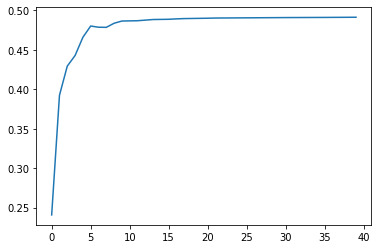

In [40]:
dual_vars = [np.zeros(x.shape) for i in range(prob.NumDual())]

num_its = 1000
step_size = 0.2
root_node = 0
costs = np.nan*np.zeros(num_its)

root_nodes = np.arange(prob.NumDual())
root_cycler = itertools.cycle(root_nodes)

print('Iteration, StepSize,    Cost,   Error')
for i in range(num_its):
    error = prob.Step(next(root_cycler), dual_vars, step_size)
    
    costs[i] = prob.ComputeCost(dual_vars)
    if(i>0):
        step_size = prob.StepSizeUpdate(step_size, costs[i], costs[i-1], error)

    if((i%2)==0):
        print('{:9d},   {:0.4f},  {:0.4f},   {:0.5f}'.format(i,step_size, costs[i], error))

    # Check for convergence 
    if(error<5e-5):
        break 
    
plt.plot(costs)
plt.show()

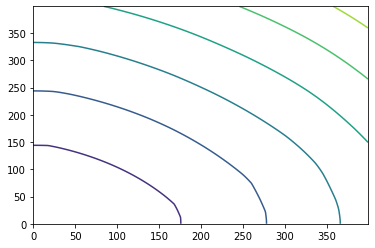

<Figure size 432x288 with 0 Axes>

In [41]:
weights = np.ones(len(measures))/len(measures)
bary = prob.Barycenter(dual_vars, weights)


Text(0.5, 1.0, 'True Barycenter')

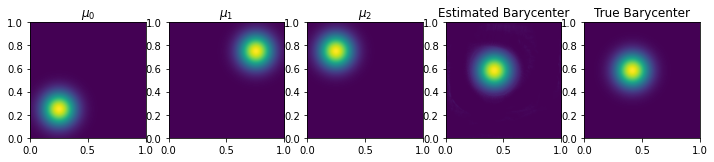

In [42]:
vmax = np.max(measures[0])
fig, axs = plt.subplots(1, len(measures)+2, figsize=(12,4))
for i in range(len(measures)):
    axs[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))#, vmin=0, vmax=vmax)
    axs[i].set_title("$\\mu_{{ {:0d} }}$".format(i))
    
axs[-2].imshow(bary, origin='lower', extent=(0,1,0,1))#, vmin=0, vmax=vmax)
axs[-2].set_title('Estimated Barycenter')

true_loc = np.mean(positions,axis=0)
true_bary = np.zeros((n2, n1))
true_bary = np.exp(-0.5*((x-true_loc[0])**2 + (y-true_loc[1])**2)*100.0)
true_bary *= n1*n2 / np.sum(true_bary)

#true_bary[(x-true_loc[0])**2 + (y-true_loc[1])**2 < r**2] = 1
#true_bary *= n1*n2 / np.sum(true_bary)

axs[-1].imshow(true_bary, origin='lower', extent=(0,1,0,1))#, vmin=0, vmax=vmax)
axs[-1].set_title('True Barycenter')


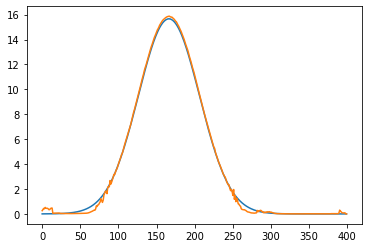

In [43]:
plt.plot(true_bary[int(0.6*n1),:])
plt.plot(bary[int(0.6*n1),:])